 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [9]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [14]:
# Clean identified numeric fields with $ symbol
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [15]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype("float")

In [16]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [17]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.head(5)

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close": "S&P500"})
sp500_returns

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_df = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
all_portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

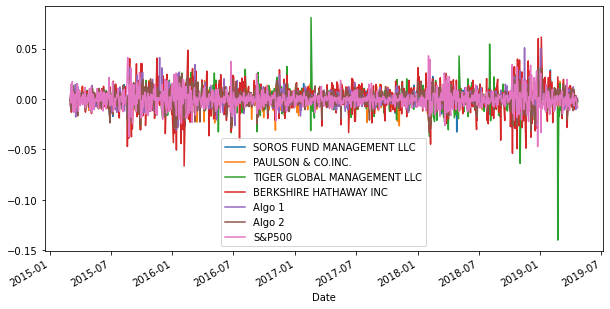

In [20]:
# Plot daily returns of all portfolios
all_portfolio_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolio_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:xlabel='Date'>

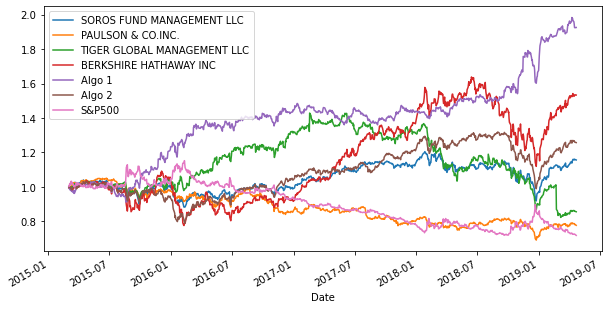

In [22]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

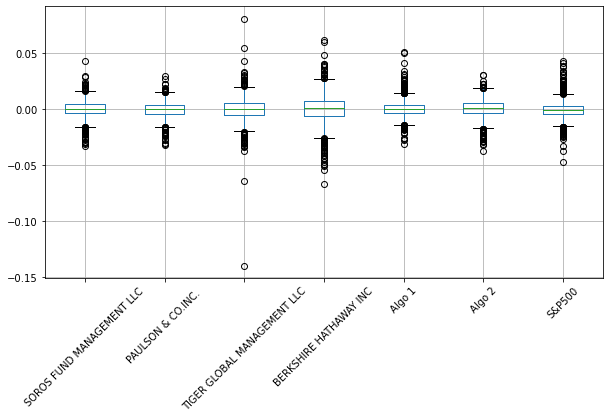

In [23]:
# Box plot to visually show risk
all_portfolio_df.boxplot(figsize=(10,5), rot =45)

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_portfolio_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = all_portfolio_df["S&P500"].std()
sp500_std

0.00858688974707399

In [26]:
# Determine which portfolios are riskier than the S&P 500
all_portfolio_df.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505


<AxesSubplot:xlabel='Date'>

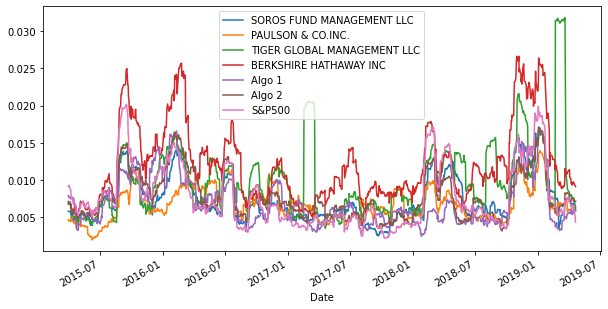

In [29]:
# Plot the rolling standard deviation
all_portfolio_df.rolling(window=21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

In [30]:
# Calculate the correlation
correlation = all_portfolio_df.corr()
# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

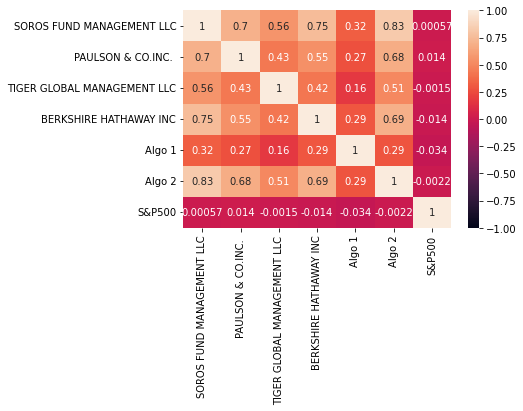

In [31]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

From the correlation matrix above, among the portfolios included, PAULSON & CO. INC. has shown the strongest positive correlation with S&P 500.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [32]:
# Calculate covariance of a single portfolio
covariance = all_portfolio_df['SOROS FUND MANAGEMENT LLC'].cov(all_portfolio_df['S&P500'])
covariance

3.8897269830622025e-08

In [33]:
# Calculate variance of S&P 500
variance = all_portfolio_df['S&P500'].var()
variance

7.373467552840441e-05

In [34]:
#Calculate beta of SOROS FUND MANAGEMENT LLC
soros_beta = covariance / variance
soros_beta

0.0005275302230853086

In [35]:
# Calculate 60-day rolling covariance of a single portfolio
rolling_covariance = all_portfolio_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_portfolio_df['S&P500'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000006
2019-04-16    0.000005
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000006
Length: 1042, dtype: float64

In [36]:
# Calculate 60-day rolling variance of S&P 500
rolling_variance = all_portfolio_df['S&P500'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P500, Length: 1042, dtype: float64

In [37]:
# Computing the 60-day rolling beta between SOROS FUND MANAGEMENT LLC and the S&P 500
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.141215
2019-04-16    0.136559
2019-04-17    0.132103
2019-04-18    0.132217
2019-04-22    0.159096
Length: 1042, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

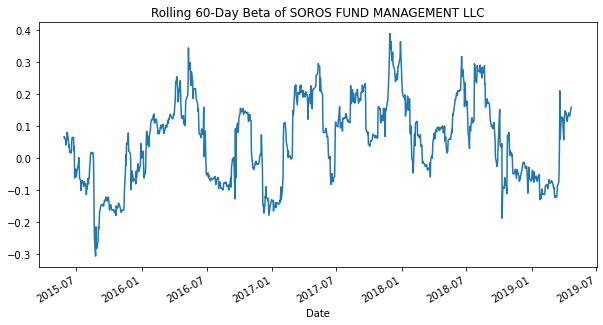

In [64]:
# Plot 60-day rolling beta trend
rolling_beta.plot(figsize=(10,5), title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [39]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = all_portfolio_df.ewm(halflife=21, adjust=True).std()
rolling_window_ewma

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Assume risk free rate equal to 0
rf_rate = 0

In [41]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolio_df.mean() - rf_rate) * 252) / (all_portfolio_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

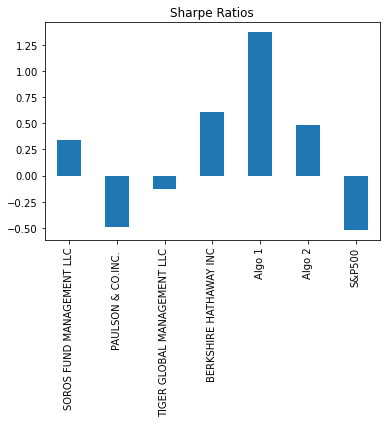

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the above calculation, the Algo 1 strategy outperformed both the market (S&P 500) and the whales portfolios. The Algo 2 strategy outperformed the market (S&P 500) and all whales portfolios except the "BERKSHIRE HATHAWAY INC" portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [43]:
# Reading data from 1st stock, set Date as index
amzn_path = Path("./Custom_portfolio/AMZN.csv")
amzn_df = pd.read_csv(amzn_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
amzn_df.head()

,Close
Date,
2015-03-02,19.28
2015-03-03,19.23
2015-03-04,19.14
2015-03-05,19.39
2015-03-06,19.00


In [44]:
# Reading data from 2nd stock, set Date as index
visa_path = Path("./Custom_portfolio/VISA.csv")
visa_df = pd.read_csv(visa_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
visa_df.head()

,Close
Date,
2015-03-02,69.57
2015-03-03,68.83
2015-03-04,68.44
2015-03-05,68.53
2015-03-06,67.33


In [45]:
# Reading data from 3rd stock, set Date as index
tsla_path = Path("./Custom_portfolio/TSLA.csv")
tsla_df = pd.read_csv(tsla_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
tsla_df.head()

,Close
Date,
2015-03-02,13.16
2015-03-03,13.30
2015-03-04,13.50
2015-03-05,13.38
2015-03-06,12.93


In [46]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([amzn_df, visa_df, tsla_df], axis="columns", join="inner")
combined_df

,Close,Close,Close
Date,,,
2015-03-02,19.28,69.57,13.16
2015-03-03,19.23,68.83,13.30
2015-03-04,19.14,68.44,13.50
2015-03-05,19.39,68.53,13.38
2015-03-06,19.00,67.33,12.93
...,...,...,...
2019-04-17,93.24,160.44,18.08
2019-04-18,93.08,160.16,18.22
2019-04-22,94.37,160.40,17.52


In [47]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["AMZN","VISA","TSLA"]
combined_df

,AMZN,VISA,TSLA
Date,,,
2015-03-02,19.28,69.57,13.16
2015-03-03,19.23,68.83,13.30
2015-03-04,19.14,68.44,13.50
2015-03-05,19.39,68.53,13.38
2015-03-06,19.00,67.33,12.93
...,...,...,...
2019-04-17,93.24,160.44,18.08
2019-04-18,93.08,160.16,18.22
2019-04-22,94.37,160.40,17.52


In [48]:
# Calculate daily returns
custom_returns = combined_df.pct_change()

# Drop NAs
custom_returns = custom_returns.dropna()

# Display sample data
custom_returns

,AMZN,VISA,TSLA
Date,,,
2015-03-03,-0.002593,-0.010637,0.010638
2015-03-04,-0.004680,-0.005666,0.015038
2015-03-05,0.013062,0.001315,-0.008889
2015-03-06,-0.020113,-0.017511,-0.033632
2015-03-09,-0.003684,0.007872,-0.015468
...,...,...,...
2019-04-17,0.000966,0.001311,-0.007684
2019-04-18,-0.001716,-0.001745,0.007743
2019-04-22,0.013859,0.001499,-0.038419


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns_df = custom_returns.dot(weights)

# Rename portfolio
my_portfolio_returns_df = my_portfolio_returns_df.rename("My Portfolio")

# Display sample data
my_portfolio_returns_df

Date
2015-03-03   -0.000864
2015-03-04    0.001564
2015-03-05    0.001829
2015-03-06   -0.023752
2015-03-09   -0.003760
                ...   
2019-04-17   -0.001802
2019-04-18    0.001427
2019-04-22   -0.007687
2019-04-23    0.010379
2019-04-24   -0.010795
Name: My Portfolio, Length: 1044, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [55]:
# Join your returns DataFrame to the original returns DataFrame
compare_portfolio_df = pd.concat([all_portfolio_df, my_portfolio_returns_df], axis="columns", join="inner")
compare_portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.000864
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.001564
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.001829
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.023752
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003760
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000315
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.011486
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001802


In [57]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
compare_portfolio_df = compare_portfolio_df.dropna()
compare_portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.000864
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.001564
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.001829
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.023752
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003760
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000315
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.011486
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001802


In [58]:
compare_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [67]:
# Calculate the daily `std`
all_daily_std = compare_portfolio_df.std()
all_daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
My Portfolio                   0.015476
dtype: float64

In [68]:
# Calculate the annualized `std`
all_annualized_std = all_daily_std * np.sqrt(252)
all_annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P500                         0.136313
My Portfolio                   0.245669
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [70]:
# Calculate rolling standard deviation
all_rolling_std = compare_portfolio_df.rolling(window=21).std()
all_rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532,0.012383
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571,0.012546
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505,0.012569


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of All Portfolios'}, xlabel='Date'>

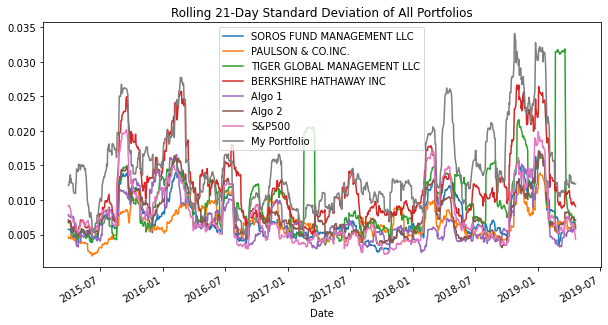

In [72]:
# Plot rolling standard deviation
all_rolling_std.plot(figsize=(10,5), title='Rolling 21-Day Standard Deviation of All Portfolios')

### Calculate and plot the correlation

In [73]:
# Calculate the correlation
all_correlation = compare_portfolio_df.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.614753
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.459636
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.421740
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.672155
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.238642
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.589256
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,0.049136
My Portfolio,0.614753,0.459636,0.421740,0.672155,0.238642,0.589256,0.049136,1.000000


<AxesSubplot:>

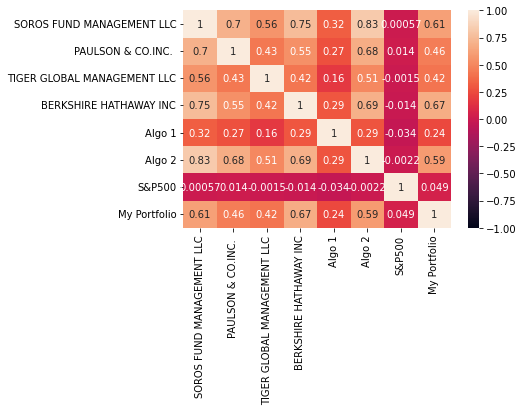

In [74]:
# Plot the correlation
sns.heatmap(all_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [75]:
# Calculate 60-day rolling covariance of my portfolio
my_rolling_covariance = compare_portfolio_df["My Portfolio"].rolling(window=60).cov(compare_portfolio_df['S&P500'])
my_rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000015
2019-04-16   -0.000003
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000002
Length: 1042, dtype: float64

In [76]:
# Calculate 60-day rolling variance of S&P 500
new_rolling_variance = compare_portfolio_df["S&P500"].rolling(window=60).var()
new_rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P500, Length: 1042, dtype: float64

In [77]:
# Computing the 60-day rolling beta between SOROS FUND MANAGEMENT LLC and the S&P 500
my_rolling_beta = my_rolling_covariance / new_rolling_variance
my_rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.361378
2019-04-16   -0.091462
2019-04-17   -0.096600
2019-04-18   -0.095157
2019-04-22   -0.040885
Length: 1042, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

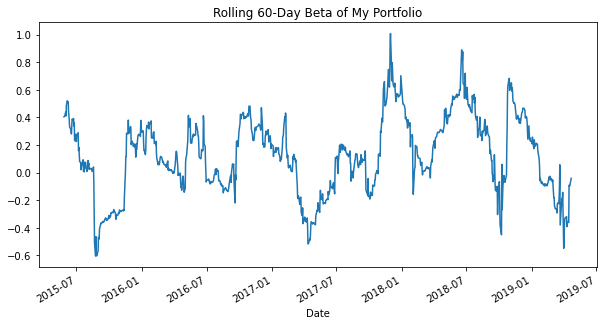

In [78]:
# Plot 60-day rolling beta trend
my_rolling_beta.plot(figsize=(10,5), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [80]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = ((compare_portfolio_df.mean() - rf_rate) * 252) / (compare_portfolio_df.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
My Portfolio                   1.112286
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

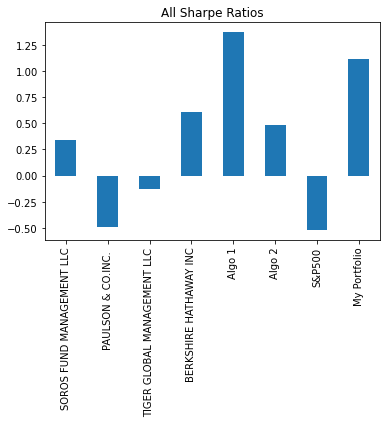

In [81]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="All Sharpe Ratios")

### How does your portfolio do?

Based on the Sharpe ratios, which measure the performance of the portfolios compared to a risk-free asset, after adjusting for their risk, my portfolio outperformed all the whales portfolios, the market (S&P 500) and the Algo 2 strategy. Its performance is only second to the Algo 1 strategy.